<a href="https://colab.research.google.com/github/afrojaakter/Natural-Language-Processing/blob/main/HeadlineSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!',
    'How are you?'
]

tokenizer = Tokenizer(num_words = 2)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'you': 5, 'cat': 6, 'how': 7, 'are': 8}


We see there are we have one token for each word. we also notice that word 'dog' and 'dog!', tokeniziser can tell they are the same word and not putting different token for 'dog' and 'dog!'. 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
             'I love to eat rice!',
             'I want to go home',
             'I feel scared of animal',
             'I like to sleep'
             ]
tokenizer = Tokenizer(num_words = 100) #to keep the most frequent 100 words if we lave a lot of words, e.g. a book or many book
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'to': 2, 'love': 3, 'eat': 4, 'rice': 5, 'want': 6, 'go': 7, 'home': 8, 'feel': 9, 'scared': 10, 'of': 11, 'animal': 12, 'like': 13, 'sleep': 14}


We see there are four i but we get only one token for the the word 'I', one token for word 'to' and so on. i.e. one word has one token number. 

###Turning sentences into data
Now we will take the sequences of numbers from the sentences and use tools to precess them and train a neural network.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
             'I love my dog',
             'I love my cat',
             'Do you love my cat!',
             'Do you think my cat is amazing?'
]

tokenizer = Tokenizer(num_words=100, oov_token="<OOV>") #oov_token put token number '1' for a unseen word in the test data
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequence = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequence)
print("\nWord Index = ", word_index)
print("\nSequence = ", sequence)
print("\nPadded Sequence =\n", padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'cat': 4, 'i': 5, 'do': 6, 'you': 7, 'dog': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequence =  [[5, 3, 2, 8], [5, 3, 2, 4], [6, 7, 3, 2, 4], [6, 7, 9, 2, 4, 10, 11]]

Padded Sequence =
 [[ 0  0  0  5  3  2  8]
 [ 0  0  0  5  3  2  4]
 [ 0  0  6  7  3  2  4]
 [ 6  7  9  2  4 10 11]]


In [ ]:
test_sentence = [
                 'I really love play with my cat',
                 'My cat loves my me'
]
test_sequence = tokenizer.texts_to_sequences(test_sentence)
padded = pad_sequences(test_sequence, maxlen= 10)
print("\nTest sequence = ", test_sequence)
print("\nPadded test sequence = \n", padded)


Test sequence =  [[5, 1, 3, 1, 1, 2, 4], [2, 4, 1, 2, 1]]

Padded test sequence = 
 [[0 0 0 5 1 3 1 1 2 4]
 [0 0 0 0 0 2 4 1 2 1]]


We see here for each unseen word we got token number '1'. words 'really', 'with', 'me', all has token number '1'. 
maxlen = 10 makes the row lenght 10 for each row in the padded matrix. If not declared then row length will be the len of largest sentence.  
'0' means no token number. 

## A classifier to recognize sentiment in text

is_sarcastic: 1 if the record is sarcastic otherwise 0

headline: the headline of the news article

article_link: link to the original news article. Useful in collenting supplementary data. But we are not using this part here. 


We will build a NN classifier to check if a headline is sarcastic or not.



In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 100
max_length = 100
truncation_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000


In [ ]:
# uploading data
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-07-07 05:07:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 142.250.153.128, 74.125.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2021-07-07 05:07:43 (201 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
# reading json data
with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [ ]:
#spliting traning and test data
training_sentences = sentences[0:training_size]
test_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
test_labels = labels[training_size:]

In [ ]:
#Preprocessing traning and test data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                                padding=padding_type, truncating=truncation_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, 
                            padding=padding_type, truncating=truncation_type)

print(training_padded.shape, test_padded.shape)

(20000, 100) (6709, 100)


In [ ]:
import numpy as np
#converting to numpy array
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                                       input_length = max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                2424      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 1,002,449
Trainable params: 1,002,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs= num_epochs, 
                    validation_data = (test_padded, test_labels), verbose = 2)

Epoch 1/30
625/625 - 8s - loss: 0.6021 - accuracy: 0.6586 - val_loss: 0.4194 - val_accuracy: 0.8295
Epoch 2/30
625/625 - 7s - loss: 0.3368 - accuracy: 0.8636 - val_loss: 0.3573 - val_accuracy: 0.8450
Epoch 3/30
625/625 - 7s - loss: 0.2557 - accuracy: 0.8985 - val_loss: 0.3445 - val_accuracy: 0.8548
Epoch 4/30
625/625 - 7s - loss: 0.2096 - accuracy: 0.9187 - val_loss: 0.3541 - val_accuracy: 0.8529
Epoch 5/30
625/625 - 7s - loss: 0.1779 - accuracy: 0.9328 - val_loss: 0.3808 - val_accuracy: 0.8478
Epoch 6/30
625/625 - 7s - loss: 0.1534 - accuracy: 0.9425 - val_loss: 0.3960 - val_accuracy: 0.8496
Epoch 7/30
625/625 - 7s - loss: 0.1311 - accuracy: 0.9531 - val_loss: 0.4306 - val_accuracy: 0.8463
Epoch 8/30
625/625 - 7s - loss: 0.1164 - accuracy: 0.9600 - val_loss: 0.4678 - val_accuracy: 0.8425
Epoch 9/30
625/625 - 7s - loss: 0.1030 - accuracy: 0.9634 - val_loss: 0.5102 - val_accuracy: 0.8360
Epoch 10/30
625/625 - 7s - loss: 0.0891 - accuracy: 0.9682 - val_loss: 0.5416 - val_accuracy: 0.8354

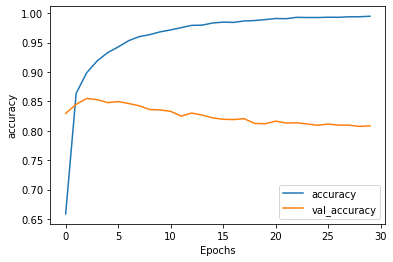

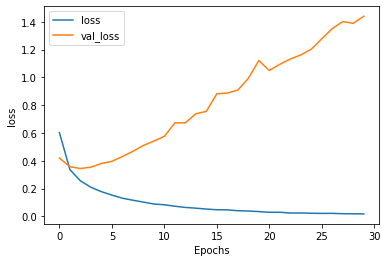

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) #shapeL (vocab_size, embedding_dim)

(10000, 100)


In [ ]:
import io
out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = [
            "granny starting to fear spiders in the garden might be real",
            "game of thrones season finale showing this sunday night"
            ]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, 
                       truncating=truncation_type)
print(model.predict(padded))

[[9.2109168e-01]
 [5.3391944e-09]]


As we see the first sentence is close to sarcastic and second sentence is close to zero indicating it less likely to be sarcastic.